In [1]:
### 특정기간 (ex: 급격한 하락, 상승등) 동안 최저가화    현재 가격을 비교  일별로  sorting  파일생성

from  mod1 import *

def period_down(from_day, to_day, some_day):  ##  from _day에서 to_day까지 최저가와  some_day부터 당일까지 일별로 가격비교 
    start = time.time()
    
    df = select_stock_period('삼성전자', some_day)
    day_list=[]
    for i in range(df.shape[0]):
        day_list.append(str(df['Date'][i]))
  
    #query = "select Name, min(Close) from market where Name = '동방' and Date > '2020-12-01' and Date < '2020-12-31' group by Name"
    query1 = "select Name, min(Close) from market where Date >" 
    query2 = "and Date <=" 
    query = query1 +"'"+ from_day +"'"+ query2 +"'"+ to_day +"'"+ " group by Name"
    
    df = pd.read_sql(query, engine)
    
    for i in day_list:

        df1 = all_stock_at(i)
        df1_last = df1[['Name','Close']]

        df2 = pd.merge(df, df1_last, on="Name")
        df2['diff']=df2['Close']/df2['min(Close)']
        df2 = df2.sort_values(by=['diff'], ascending='True')
        df2 = df2.reset_index(drop=True)
        #display(df2)
        df2.to_excel(path_down+i+'.xlsx')
    try:
        os.mkdir(path_down+from_day+'_'+to_day+'/')
    except:
            pass
    for filename in glob.glob(os.path.join(path_down , '*.*')):
        try:
            shutil.copy(filename, path_down+from_day+'_'+to_day+'/')
        except:
            pass
    print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
    
period_down('2021-07-01', '2021-08-20', '2021-08-20')

time : 58.15431356430054


In [1]:
##  기간동안 낙폭 과대종목 검색 (기간동안 최저점에서 현재가 비교)_1

import time
from  mod1 import *

date_query = "select Date from market where Name='hrs' order by Date desc limit 1"

df = pd.read_sql(date_query, engine)
df = pd.to_datetime(df['Date'])
df = str(df)
last_date = df[4:14]                ## table에서 최종 날짜 추줄

def all_stock_period(date1, date2='2021-01-01'):
    select_query = "select * from market_good where Date >=  "
    var = select_query +"'"+date1+"'"  +" "+ 'and Date <=' + "'"+date2+"'"
    df = pd.read_sql(var, engine)
    return df

def flow_close(method, standard_day=last_date):
    start = time.time()  # 시작 시간 저장
    df=method
    df = method
    df_uniq = df['Name'].unique()
    df_uniq_list=df_uniq.tolist()

    min_data = []
    for x in df_uniq_list:
        min_value = min(df[df['Name']== x ].Close)
        min_data.append(min_value)

    min_close = pd.DataFrame(min_data)

    df_a=pd.DataFrame(df_uniq)


    df_first=pd.DataFrame()
    df_first['Name']=df_a[0]
    df_first['Close']=min_close[0]
    df_to = all_stock_at(standard_day)
    df_last=df_to[['Name','Close']]
    df = pd.merge(df_first,df_last,on='Name')

    df['diff']=df['Close_y']/df['Close_x']
    df.head()

    close_diff_df =  df.sort_values(["diff"],ascending=True)
    close_diff_df.head()

    close_diff_df.to_excel("d:\\"+last_date+"_down.xlsx")
    print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간
flow_close(all_stock_period('2021-07-01','2021-07-31'))

time : 10.811245441436768


In [10]:
df.to_excel('d:/last_database.xlsx')

all: 15
all: 15


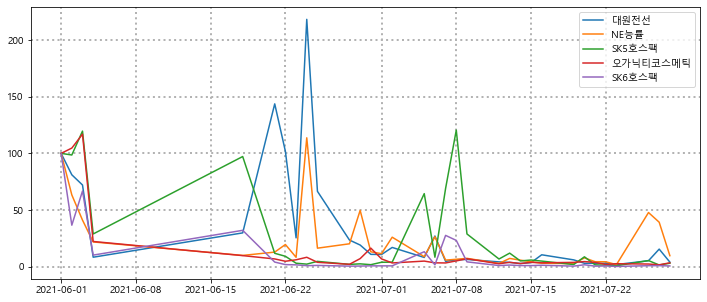

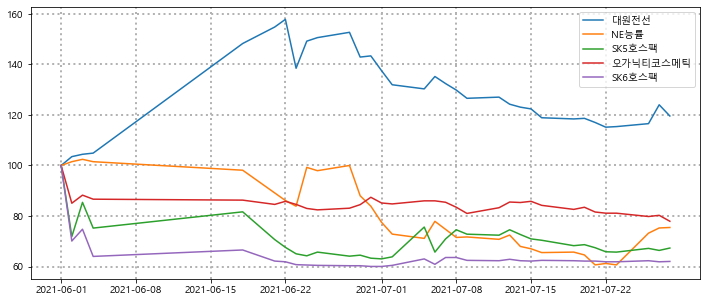

In [11]:
from mod1 import *

def aaa_graph(path_name, day,from_day, subject, count=5):
    name = pd.read_excel(path_name+day+'.xlsx')
    name.columns = map(str.lower, name.columns)
    name = name['name']
    print('all:', name.shape[0])
    name = name.iloc[count:count+5]
    name = name.to_list()
 
    df1 = pd.DataFrame()

    for x in  name:
        df = select_stock_period(x, from_day)
        try:
            df['shift_P'] = df['Close'].shift()
            df['shift_V'] = df['Volume'].shift()
            df['shift_P'][0]=df['Close'][0]
            #df['shift_P'][0]=df['Close'].iloc[:5].mean()
            df['shift_V'][0]=df['Volume'][0]
            df['mean_V']= df['Volume'].mean()
            df['slope_P']=df['Close']/df['shift_P']
            df['slope_V']=df['Volume']/df['shift_V']
            df['slope_MV']=df['Volume']/df['mean_V']
            df['OH']=df['High']/df['Open']
            df['OL']=df['Low']/df['Open']
            df['OC']=df['Close']/df['Open']
            df['CH']=df['High']/df['Close']
            df['CL']=df['Low']/df['Close']
            df = df[['Date',subject]]
            df.columns=['Date',x]
        except:
            pass
        
        if df1.empty:
            df1 = df
        elif df.empty:  ##  종목이 상장폐지되어 없어진것은 merge하지 않는다
            pass
        else:
            df1 = pd.merge (df,df1,on='Date')
    df1=df1.set_index('Date')
    df1 = df1[df1.columns[::-1]]  ##  그래프 생성시 legend를 순서대로 나오게하기위해  columns를  재구성
    name=df1.columns.tolist() ##  df에서  상장폐지되어 df1에 없어진 columnes를 수정하여 현행화한 name list
    
    plt.figure(figsize=(12,5))
    for i in range(len(name)):
        plt.plot(df1[name[i]]/df1[name[i]].iloc[0]*100)
        plt.legend(name,loc=0)
        plt.grid(True,color='0.7',linestyle=':',linewidth=2)
        
from mod1 import *
day1='2021-06-01'
day2='2020-01-01'

day=day1
some_day = day1
path_name = path_price
name_day=day
from_day=some_day
#from_day= name_day
count=0

#aaa_graph(path_name, name_day, from_day,'Volume', count)
aaa_graph(path_name, name_day, from_day,'slope_MV', count)
#aaa_graph(path_name, name_day, from_day,'slope_V', count)
aaa_graph(path_name, name_day, from_day,'Close', count)  

In [4]:
print(depress)

<function depress at 0x000001C587D533A0>


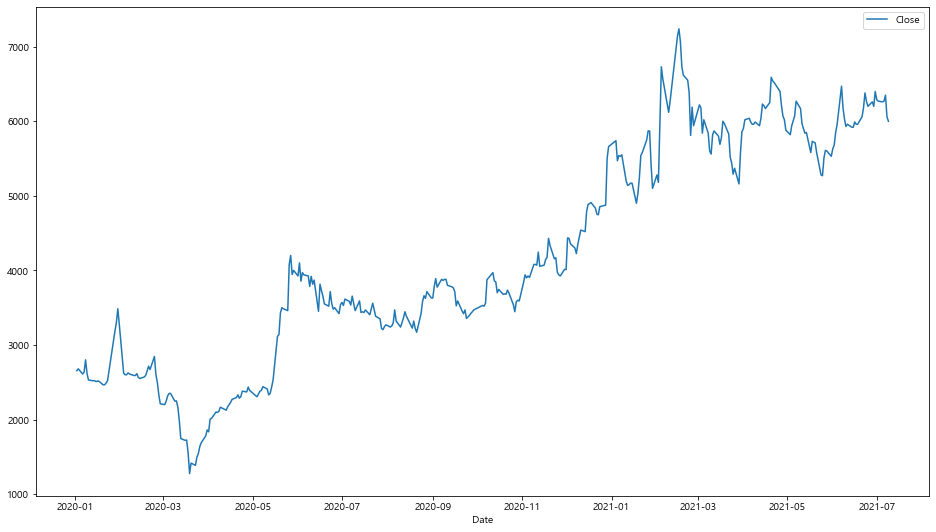

In [21]:
price_df = df.loc[:, ['Close']].copy()
price_df.plot(figsize=(16,9))

In [23]:
price_df['daily_rtn'] = price_df['Close'].pct_change()
price_df['st_rtn'] = (1+price_df['daily_rtn']).cumprod()
price_df

,Close,daily_rtn,st_rtn
Date,,,
2020-01-02,2655,NaN,NaN
2020-01-03,2680,0.009416,1.009416
2020-01-06,2610,-0.026119,0.983051
2020-01-07,2635,0.009579,0.992467
2020-01-08,2800,0.062619,1.054614
...,...,...,...
2021-07-05,6260,-0.001595,2.357815
2021-07-06,6270,0.001597,2.361582
2021-07-07,6350,0.012759,2.391714


all: 15
all: 15
all: 15


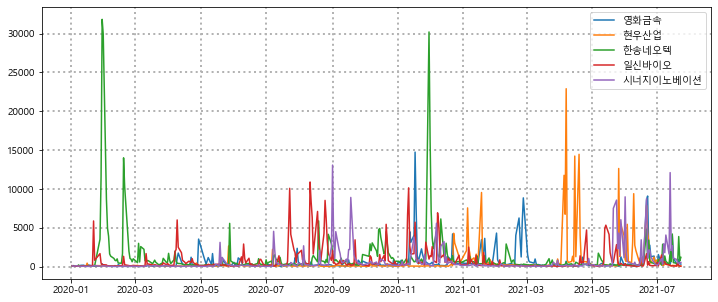

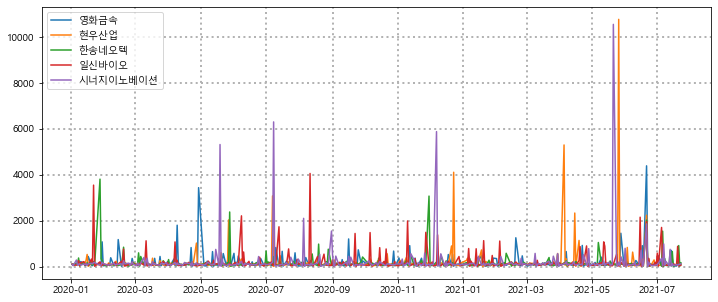

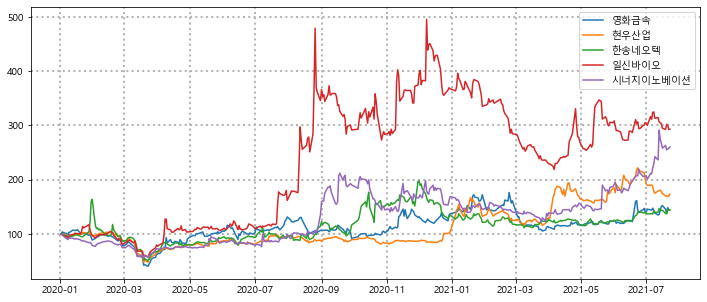

In [3]:
def aaa_graph(path_name, day,from_day, subject, count=5):
    name = pd.read_excel(path_name+day+'.xlsx')
    name.columns = map(str.lower, name.columns)
    name = name['name']
    print('all:', name.shape[0])
    name = name.iloc[count:count+5]
    name = name.to_list()
 
    df1 = pd.DataFrame()

    for x in  name:
        df = select_stock_period(x, from_day)
        df['shift_P'] = df['Close'].shift()
        df['shift_V'] = df['Volume'].shift()
        df['shift_P'][0]=df['Close'][0]
        df['shift_V'][0]=df['Volume'][0]
        df['mean_V']= df['Volume'].mean()
        df['slope_P']=df['Close']/df['shift_P']
        df['slope_V']=df['Volume']/df['shift_V']
        df['slope_MV']=df['Volume']/df['mean_V']
        df['OH']=df['High']/df['Open']
        df['OL']=df['Low']/df['Open']
        df['OC']=df['Close']/df['Open']
        df['CH']=df['High']/df['Close']
        df['CL']=df['Low']/df['Close']
        df = df[['Date',subject]]
        df.columns=['Date',x]
        
        if df1.empty:
            df1 = df
        elif df.empty:  ##  종목이 상장폐지되어 없어진것은 merge하지 않는다
            pass
        else:
            df1 = pd.merge (df,df1,on='Date')
    df1=df1.set_index('Date')
    df1 = df1[df1.columns[::-1]]  ##  그래프 생성시 legend를 순서대로 나오게하기위해  columns를  재구성
    name=df1.columns.tolist() ##  df에서  상장폐지되어 df1에 없어진 columnes를 수정하여 현행화한 name list
    
    plt.figure(figsize=(12,5))
    for i in range(len(name)):
        plt.plot(df1[name[i]]/df1[name[i]].iloc[0]*100)
        plt.legend(name,loc=0)
        plt.grid(True,color='0.7',linestyle=':',linewidth=2)
        
from mod1 import *
day1='2021-06-21'
day2='2020-01-01'

day=day1
some_day = day2
path_name = path_volume
name_day=day
from_day=some_day
#from_day= name_day
count=0

#aaa_graph(path_name, name_day, from_day,'Volume', count)
aaa_graph(path_name, name_day, from_day,'slope_MV', count)
aaa_graph(path_name, name_day, from_day,'slope_V', count)
aaa_graph(path_name, name_day, from_day,'Close', count)  

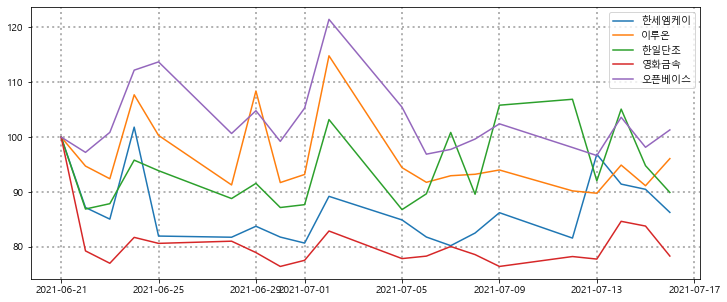

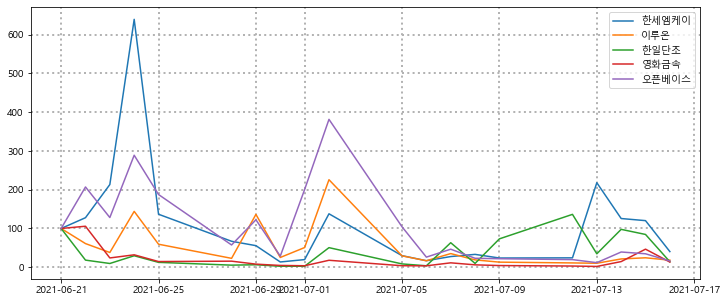

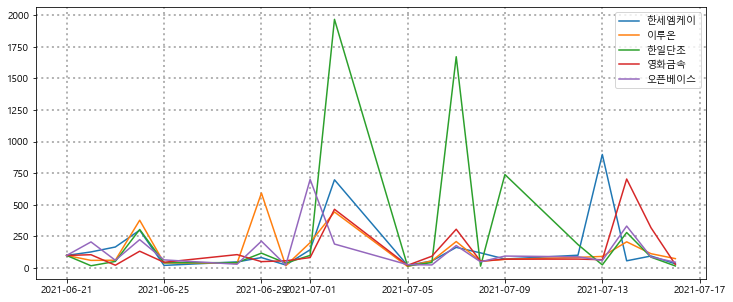

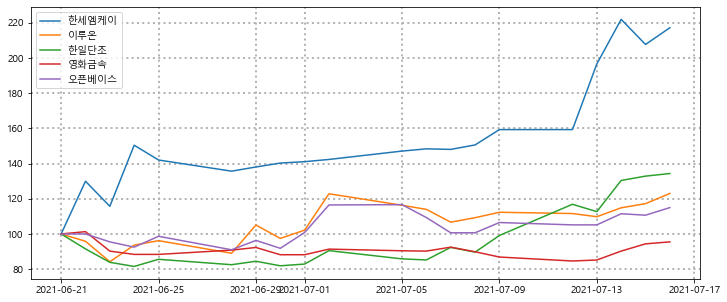

In [4]:
from mod1 import *
def bbb_graph(path_name, day,from_day, subject, count=0):
    #name = pd.read_excel(path_name+day+'.xlsx')
    #name.columns = map(str.lower, name.columns)
    #name = name['name']
    #print('all:', name.shape[0])

    #name = name.iloc[count:count+5]
    #name = name.to_list()
    #name = ["대한항공",'우리금융지주','웹젠', "LG디스플레이",'YG엔터','한화솔루션']
    #name = ['남선알미늄','SDN','유아이엘','영화금속','오픈베이스']
    name = ["한세엠케이",'이루온','한일단조', "영화금속",'오픈베이스']


    #name=['미래나노텍','유성티엔에스','하림','다우데이타','한세실업','네오위즈','하이트진로홀딩스','바디텍메드','이스트소프트','파이오링크']
    #name=['현대모비스','보해양조','해성옵틱스','유아이엘','백광산업','야스','오텍','액트로','화승인더','삼원강재','신성이엔지','액트로','이디티','야스','오텍','퓨쳐스트림네트웍스','현대홈쇼핑','카스']
    name=name[count:count+5]
    df1 = pd.DataFrame()

    for x in  name:
        df = select_stock_period(x, from_day)
        df['shift_P'] = df['Close'].shift()
        df['shift_V'] = df['Volume'].shift()
        df['shift_P'][0]=df['Close'][0]
        df['shift_V'][0]=df['Volume'][0]
        df['mean_V']= df['Volume'].mean()
        df['slope_P']=df['Close']/df['shift_P']
        df['slope_V']=df['Volume']/df['shift_V']
        df['slope_MV']=df['Volume']/df['mean_V']
        df['OH']=df['High']/df['Open']
        df['OL']=df['Low']/df['Open']
        df['OC']=df['Close']/df['Open']
        df['CH']=df['High']/df['Close']
        df['CL']=df['Low']/df['Close']
        df = df[['Date',subject]]
        df.columns=['Date',x]
        
        if df1.empty:
            df1 = df
        elif df.empty:  ##  종목이 상장폐지되어 없어진것은 merge하지 않는다
            pass
        else:
            df1 = pd.merge (df,df1,on='Date')
    df1=df1.set_index('Date')
    df1 = df1[df1.columns[::-1]]  ##  그래프 생성시 legend를 순서대로 나오게하기위해  columns를  재구성
    name=df1.columns.tolist() ##  df에서  상장폐지되어 df1에 없어진 columnes를 수정하여 현행화한 name list
    
    plt.figure(figsize=(12,5))
    for i in range(len(name)):
        plt.plot(df1[name[i]]/df1[name[i]].iloc[0]*100)
        plt.legend(name,loc=0)
        plt.grid(True,color='0.7',linestyle=':',linewidth=2)
        
        
from mod1 import *
day1='2021-06-21'
day2='2020-01-01'

day=day1
some_day = day1
path_name = path_volume
name_day=day
from_day=some_day
#from_day= name_day
count=0

bbb_graph(path_name, name_day, from_day,'OH', count)
bbb_graph(path_name, name_day, from_day,'slope_MV', count)
bbb_graph(path_name, name_day, from_day,'slope_V', count)
bbb_graph(path_name, name_day, from_day,'Close', count)

all: 15


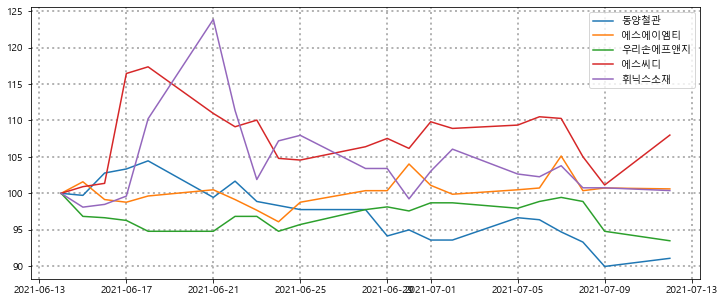

In [12]:
def compare_graph(path_name, day,from_day, subject, count=5):
    name = pd.read_excel(path_name+day+'.xlsx')
    name.columns = map(str.lower, name.columns)
    name = name['name']
    print('all:', name.shape[0])
    name = name.iloc[count:count+5]
    name = name.to_list()
    
    df1 = pd.DataFrame()

    for x in  name:
        df = select_stock_period(x, from_day)
        df = df[['Date',subject]]
        df.columns=['Date',x]
        
        if df1.empty:
            df1 = df
        elif df.empty:  ##  종목이 상장폐지되어 없어진것은 merge하지 않는다
            pass
        else:
            df1 = pd.merge (df,df1,on='Date')
    df1=df1.set_index('Date')
    df1 = df1[df1.columns[::-1]]  ##  그래프 생성시 legend를 순서대로 나오게하기위해  columns를  재구성
    name=df1.columns.tolist() ##  df에서  상장폐지되어 df1에 없어진 columnes를 수정하여 현행화한 name list
    
    plt.figure(figsize=(12,5))
    for i in range(len(name)):
        plt.plot(df1[name[i]]/df1[name[i]].iloc[0]*100)
        plt.legend(name,loc=0)
        plt.grid(True,color='0.7',linestyle=':',linewidth=2)


from mod1 import *
day='2021-06-14'
some_day = '2021-06-14'
path_name = path_volume
name_day=day
from_day=some_day
#from_day= name_day
count=0

compare_graph(path_name, name_day, from_day,'Close', count)